<h1 style='font-size:4rem;color:orange;'>Math 267 Project #2

---

Solution notebook
---

## Euler's method for system of odes.

We consider the first-order autonomous system 


$$ x'(t) = f (x, y)$$
$$ y'(t) = g(x, y) $$
along with the initial conditions

$$x(t_0) = x_0 $$
$$y(t_0) = y_0 $$

Notice that for the autonomous system t is not present in the slope functions f and g. The vector valued function $ F = (f (x, y), g(x, y))$ is called a vector field. We calculate the Euler approximation for this system by iterating the formulas

$$ t_{n+1} =t_n + Δt $$
$$ x_{n+1} =x_n + f(x_n, y_n) \Delta t$$
$$ y_{n+1} = y_n + g(x_n, y_n) \Delta t$$

---

## Exercise 1.  We will demonstrate how Euler's method can be used to solve the predator prey model and graph your results. The model is below.

$$x' = -0.1  x + 0.02 x y $$
$$y' = 0.2 y - 0.025xy$$
$$ x(0) = y(0) =6 $$

Note that x(t) represents the fox population at time t and y(t) represents the rabbit population. The populations are measured in thousands. Please see problem 3.3.11 in your text.

### Execute the cell below to import the necessary libraries

In [7]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
# uncomment the line below if you are running a macbook

%config InlineBackend.figure_format ='retina'

<h3> The python code to numerically solve the above system is in the cell below. Read the code and understand each instruction.
    Afterwards execute the cell.

In [18]:
# define the slope functions

def f(x,y):
    return -0.1*x + 0.02*x*y

def g(x,y):
    return 0.2*y - 0.025*x*y


h = 0.1  # set delta t
t = np.arange(0,100,h)

# Initialeze arrays to store the results.

x = np.zeros_like(t)
y = np.zeros_like(t)

# Set initial conditions:

x[0] = y[0] = 6

# implement Euler's method

for i in range (len(t)-1):
    x[i+1] = x[i] + f(x[i],y[i]) * h
    y[i+1] = y[i] + g(x[i],y[i]) * h
    
    


### Execute the cell below to graph your results.
You should note that the populations are changing periodically

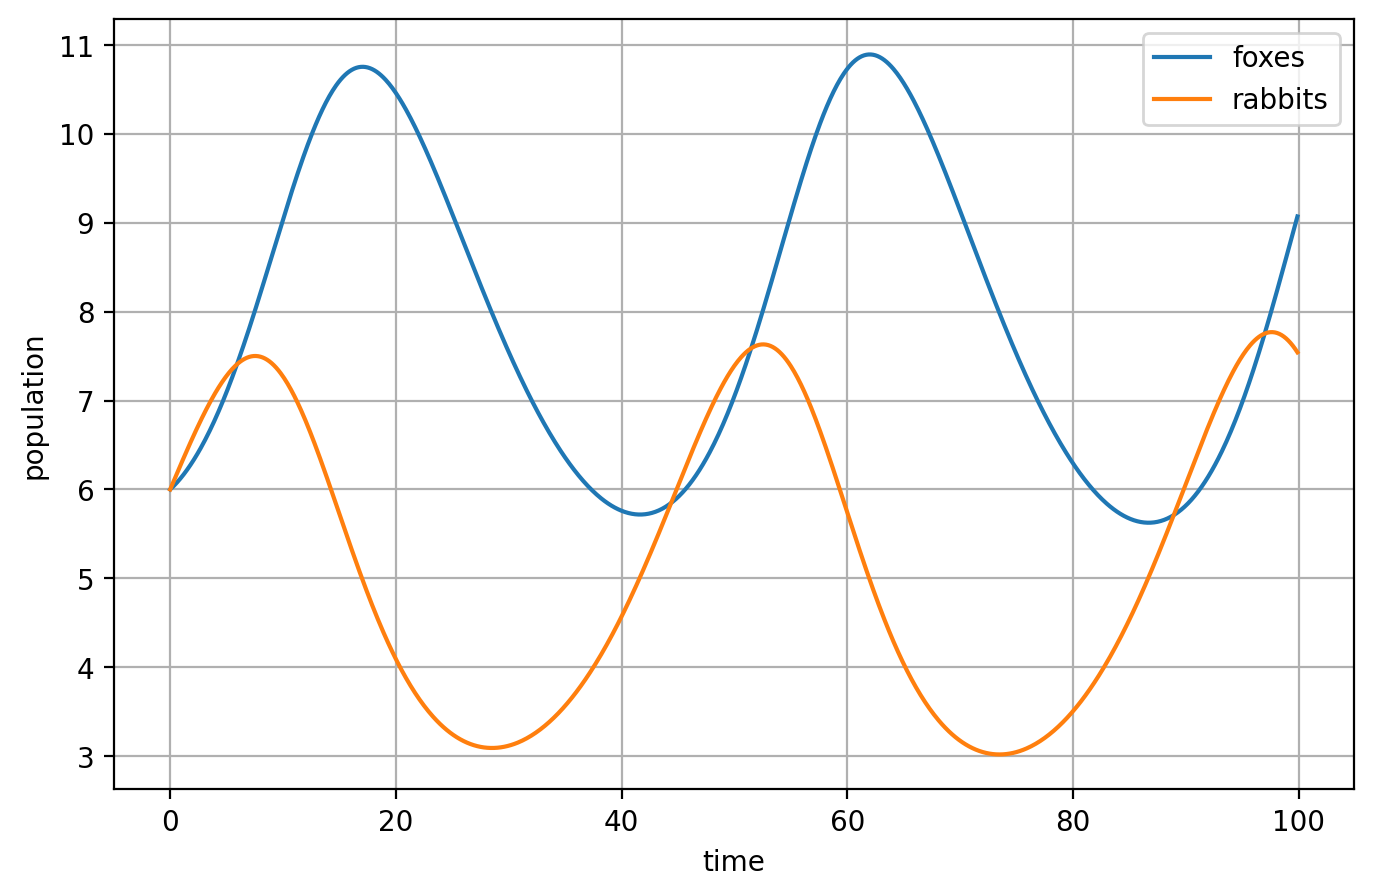

In [19]:
plt.figure(figsize=(8,5))
plt.plot(t,x,label='foxes')
plt.plot(t,y,label='rabbits')
plt.legend()
plt.grid()
plt.xlabel('time')
plt.ylabel('population');


### Execute the cell below to see the trajectory in the phase plane for this problem.  See chapter 10 in the text for more details on phase potraits.

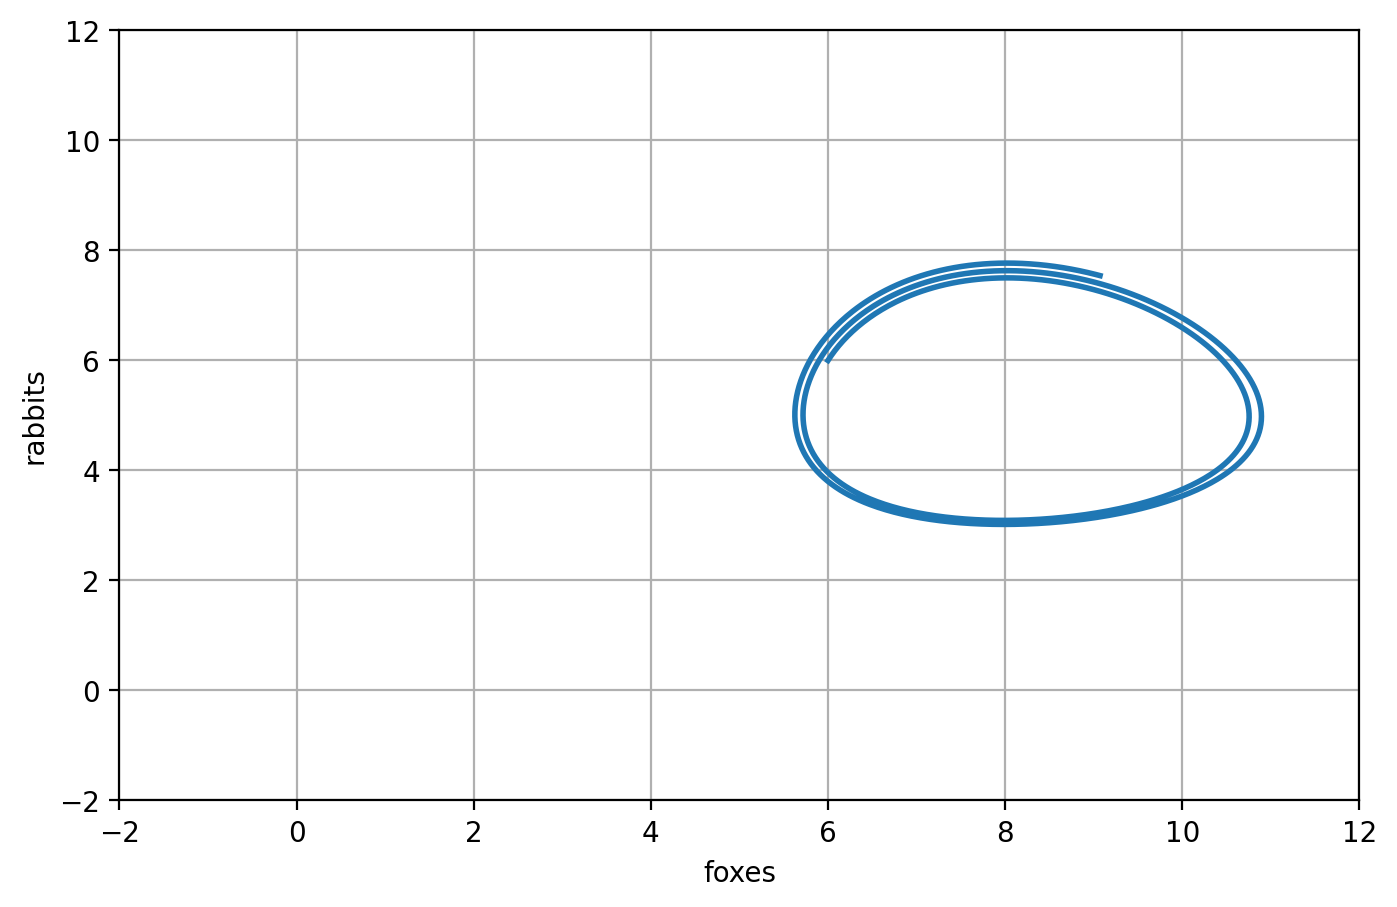

In [20]:
plt.figure(figsize=(8,5))
plt.plot(x,y,linewidth=2)
plt.xlim(-2,12)
plt.ylim(-2,12)
plt.grid()
plt.xlabel('foxes')
plt.ylabel('rabbits');

---
## Exercise 2. Improved Euler’s Method for Systems


From the discussion above we can readily see how to apply the Improved Euler’s method to the first order autonomous system of equations. All that is required is that we iterate the following formulas.

$$t_{n+1} =t_n + Δt$$
$$F1 =f(x_n,y_n)$$
$$G1 = g(x_n, y_n)$$
$$F2 =f(x_n +F1*Δt, y_n +G1*Δt)$$ 
$$G2 =g(x_n +F1*Δt, y_n +G1*Δt)$$
$$x_{n+1} =x_n + (F1 +F2)/2*Δt$$
$$y_{n+1} =y_n +(G1 + G2)/2*Δt$$

Redo the exercise above now using the improved Euler's method.  With the improved method h = 1 will work and you only need to compute 100 values.  So the following command will create your t array. Cut and past the cells above to recreate the plots.  You will know your solution is correct if your phase potrait shows a closed loop instead of a spiral.

```python
t = np.arange(0,100,1.0)

```

## Improved Euler Method

In [27]:
# define the slope functions

def f(x,y):
    return -0.1*x + 0.02*x*y

def g(x,y):
    return 0.2*y - 0.025*x*y


h = 1.0  # set delta t
t = np.arange(0,100,h)

# Initialize arrays to store the results.

x = np.zeros_like(t)
y = np.zeros_like(t)

# Set initial conditions:

x[0] = y[0] = 6

# implement Euler's method

for i in range (len(t)-1):
    
    F1 = f(x[i],y[i])
    G1 = g(x[i],y[i])
    
    
    
    F2 = f(x[i]+F1*h,y[i]+G1*h)
    G2 = g(x[i]+F1*h,y[i]+G1*h)
    
    slope1 = (F1+F2)/2
    slope2 = (G1+G2)/2
    
   
    x[i+1] = x[i] + slope1 * h
    y[i+1] = y[i] + slope2 * h
    
    


array([6.        , 6.13956   , 6.31946949, 6.54096386, 6.80439589,
       7.10875923, 7.4511466 , 7.82621366, 8.22576544, 8.63861656])

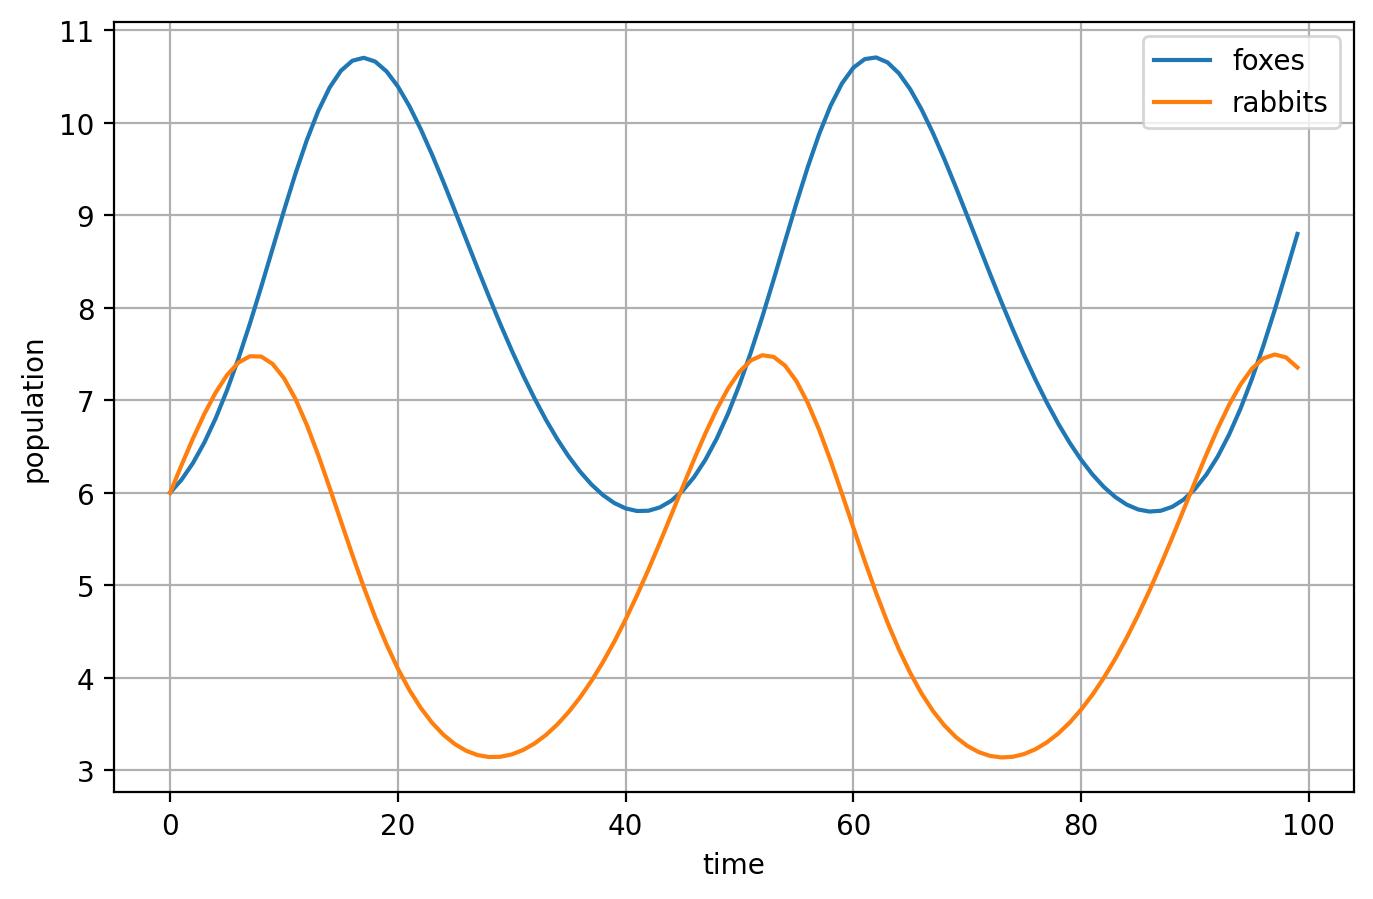

In [22]:
plt.figure(figsize=(8,5))
plt.plot(t,x,label='foxes')
plt.plot(t,y,label='rabbits')
plt.legend()
plt.grid()
plt.xlabel('time')
plt.ylabel('population');
x[:10]

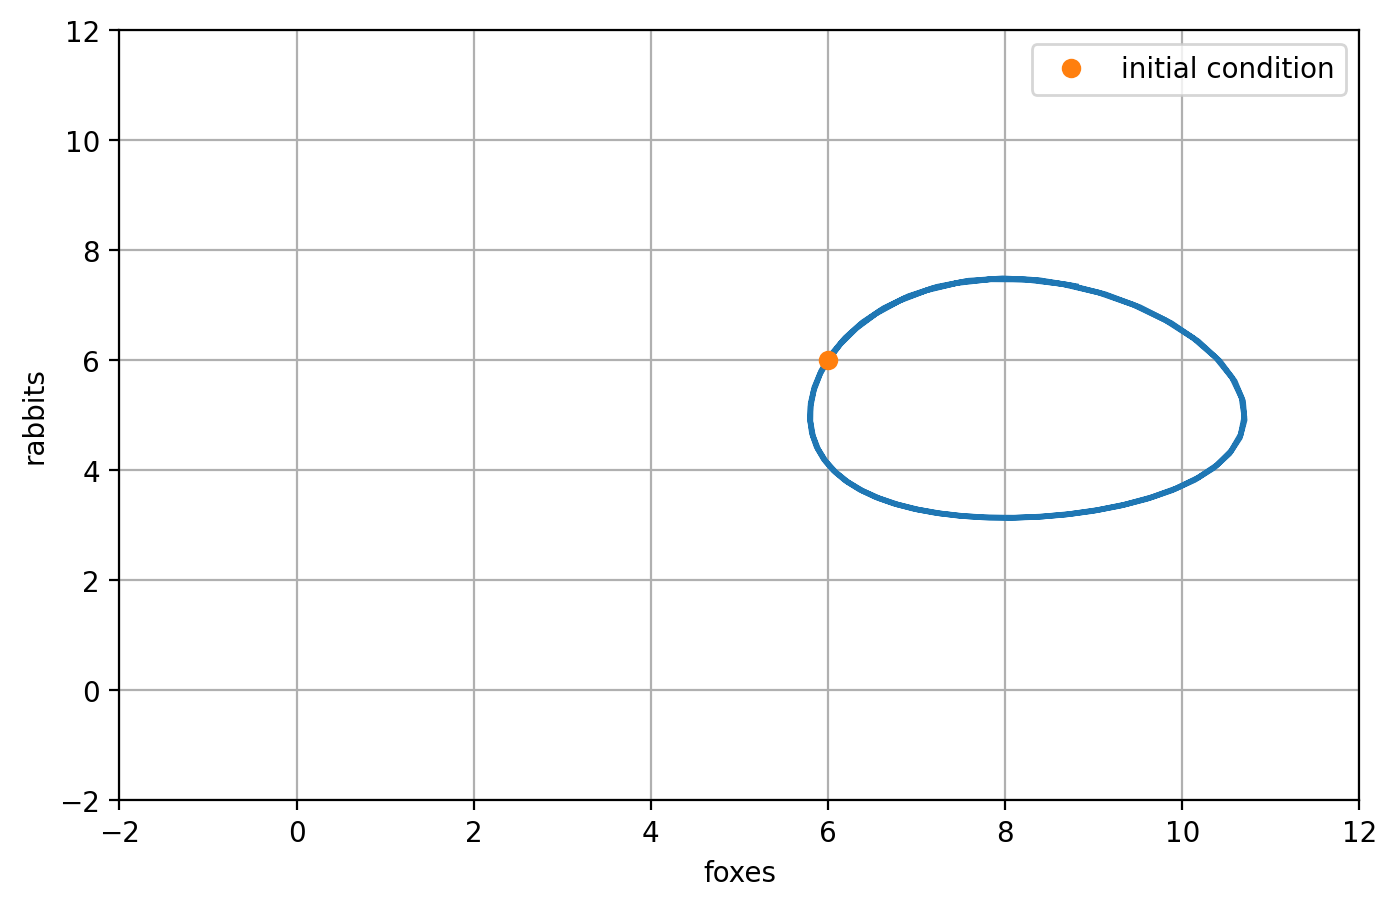

In [23]:
plt.figure(figsize=(8,5))
plt.plot(x,y,linewidth=2)
plt.xlim(-2,12)
plt.ylim(-2,12)
plt.grid()
plt.xlabel('foxes')
plt.ylabel('rabbits');
plt.plot(6,6,'o',label="initial condition")
plt.legend()

---
### Answer the questions below.  Edit the cell and enter your answers.
---

1. The popuation for the foxes is periodic. Determine the period.

2. Find the value of t for t>0 where the populations are first equal.

3. Find all equilibrium solutions for the predator prey model.  Hint: set the vector field equation to zero and solve for x and y.  There are two equilibrium solutions ( points in the plane where the "cork" will not move.)


### 1. Find the period.

In [56]:
vals=np.sort(x)[-2:] # find the two peak values
a=np.where(x==vals[0]) # find location of these peaks
b=np.where(x==vals[1])
period = int(abs(a[0]-b[0]))

print(f"The period for the population is {period}.")

The period for the population is 45.


### 2. Find when the populations are equal.

In [77]:
val=np.argmin(abs((x-y))[1:20])
print(f" The populations are first equal for t>0 at t={val+1}.")


 The populations are first equal for t>0 at t=6.


### 3. Find the equilibrium points.

We use sympy to solve the nonlinear system. For documentation on sympy go to https://docs.sympy.org/latest/index.html

Below we show the two equilbrium points are $$(0,0)\; \text {and}\; (8,5).$$

In [1]:
import sympy as sym
sym.init_printing() 

x,y = sym.symbols('x,y')
eq1 = sym.Eq(-0.1*x + 0.02*x*y,0)
eq2 = sym.Eq(0.2*y - 0.025*x*y,0)
result = sym.solve([eq1,eq2],(x,y))
print(result)

[(0.0, 0.0), (8.00000000000000, 5.00000000000000)]
